In [1]:
## This dataset basically consists of crop yield and the factors affecting it.
## Originally, extracted from world bank data and was published in Kaggle
## In this personal project I will be performing EDA, and implement machine learning
## like Random Forest and Gradient Boosting Machine's LightGBM to predict crop yield

In [2]:
#import the necessary libararies:

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import VarianceThreshold ,f_classif ,SelectKBest
from sklearn.metrics import classification_report,confusion_matrix 
from sklearn import svm
from sklearn import tree
from sklearn.preprocessing import LabelEncoder ,StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.base import BaseEstimator,TransformerMixin

Part 1 : Loading the data & some Statistcal methods :

In [3]:
# load the dataset :

data=pd.read_csv("Crop_Recommendation.csv")
data.head(10)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,Rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,Rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,Rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,Rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,Rice


In [4]:
# some Analysis $ Statistical methods :

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
# shape of dataset:

print(f"shape of the dataset ---- >>> {np.shape(data)}")

shape of the dataset ---- >>> (2200, 8)


In [6]:
# check the null values :
# no null values is found 
data.isna().mean()

Nitrogen       0.0
Phosphorus     0.0
Potassium      0.0
Temperature    0.0
Humidity       0.0
pH_Value       0.0
Rainfall       0.0
Crop           0.0
dtype: float64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Nitrogen,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
Phosphorus,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
Potassium,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
Temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
Humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
pH_Value,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
Rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


part2 : Extract and Explantory the dataset:

In [8]:
# Extract all types of data from the dataset:

for col in data.columns:
    obj_cols=data.select_dtypes("object").columns
    disc_cols=data.select_dtypes(include="int64").columns
    cont_cols=data.select_dtypes(include="float64").columns
    num_cols=data.select_dtypes("number").columns
    Nomial_cols=data.nunique()[data.nunique()<3]

print(f"object columns --->>> {obj_cols} \n discrete columns --->>> {disc_cols}")
print(f"continous columns --->>> {cont_cols} \n Numerical columns --->>> {num_cols} \n Nominal columns --->> {Nomial_cols}")

object columns --->>> Index(['Crop'], dtype='object') 
 discrete columns --->>> Index(['Nitrogen', 'Phosphorus', 'Potassium'], dtype='object')
continous columns --->>> Index(['Temperature', 'Humidity', 'pH_Value', 'Rainfall'], dtype='object') 
 Numerical columns --->>> Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall'],
      dtype='object') 
 Nominal columns --->> Series([], dtype: int64)


In [9]:
# to know counts of every column in dataset:
for col in data:
    print(f"number of every item in---> {data[col].value_counts()}")
    print("*"*50)

number of every item in---> Nitrogen
22     44
40     44
27     42
39     41
31     41
       ..
136     2
139     1
135     1
130     1
46      1
Name: count, Length: 137, dtype: int64
**************************************************
number of every item in---> Phosphorus
60    56
58    48
56    46
55    44
57    42
      ..
83     2
82     2
90     2
93     1
84     1
Name: count, Length: 117, dtype: int64
**************************************************
number of every item in---> Potassium
17    90
22    87
15    86
20    80
25    78
      ..
5      8
11     8
13     7
7      5
80     4
Name: count, Length: 73, dtype: int64
**************************************************
number of every item in---> Temperature
20.879744    1
29.480699    1
29.943492    1
28.033065    1
29.884305    1
            ..
25.365861    1
28.568406    1
30.284966    1
27.325421    1
23.603016    1
Name: count, Length: 2200, dtype: int64
**************************************************
number of eve

Part3 : Visualization 

/tmp/ipykernel_5805/2726866802.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_Rainfall.index, y=top_10_Rainfall.values,palette='coolwarm')


Text(0, 0.5, 'Rainfall')

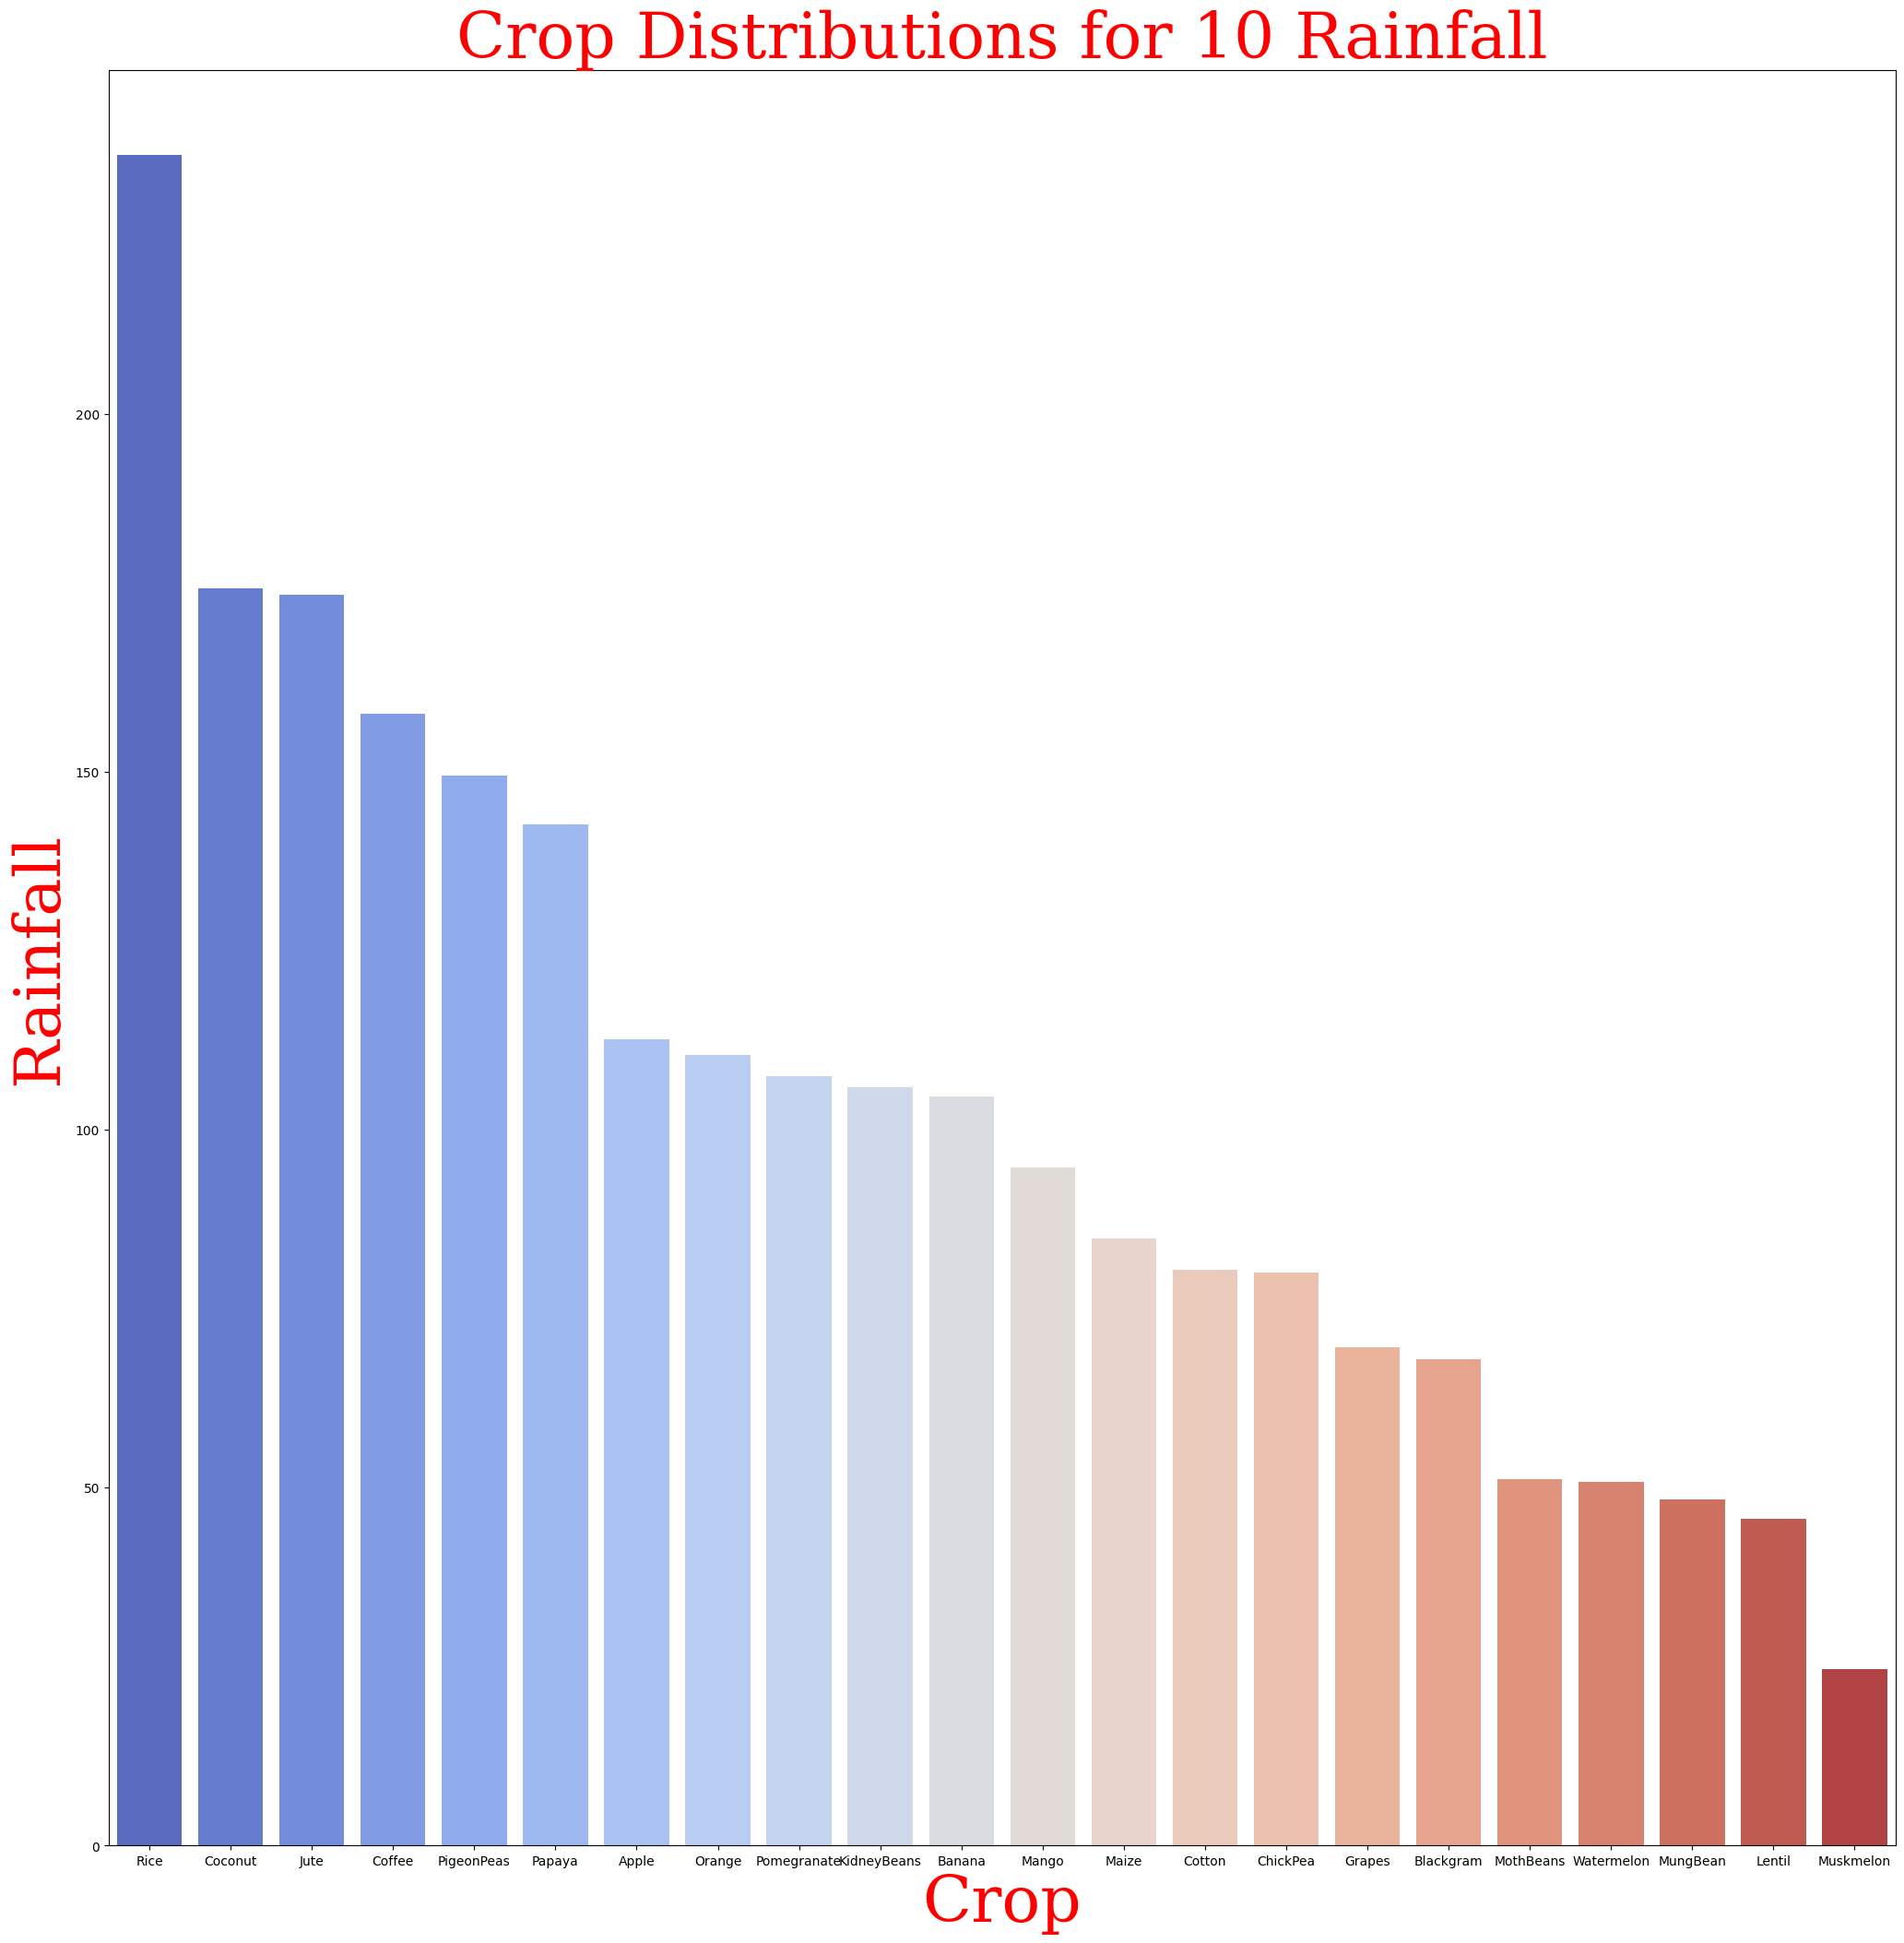

In [5]:
#observe crop  distribution of top 10 Rainfall
f={"family":"serif","size":50,"color":"r"}
top_10_Rainfall = data.groupby('Crop')['Rainfall'].mean().sort_values(ascending=False)
plt.figure(figsize=(25,25))
sns.barplot(x=top_10_Rainfall.index, y=top_10_Rainfall.values,palette='coolwarm')
plt.title('Crop Distributions for 10 Rainfall',fontdict=f)
plt.xlabel('Crop',fontdict=f)
plt.ylabel('Rainfall',fontdict=f)

Text(0, 0.5, 'Rainfall')

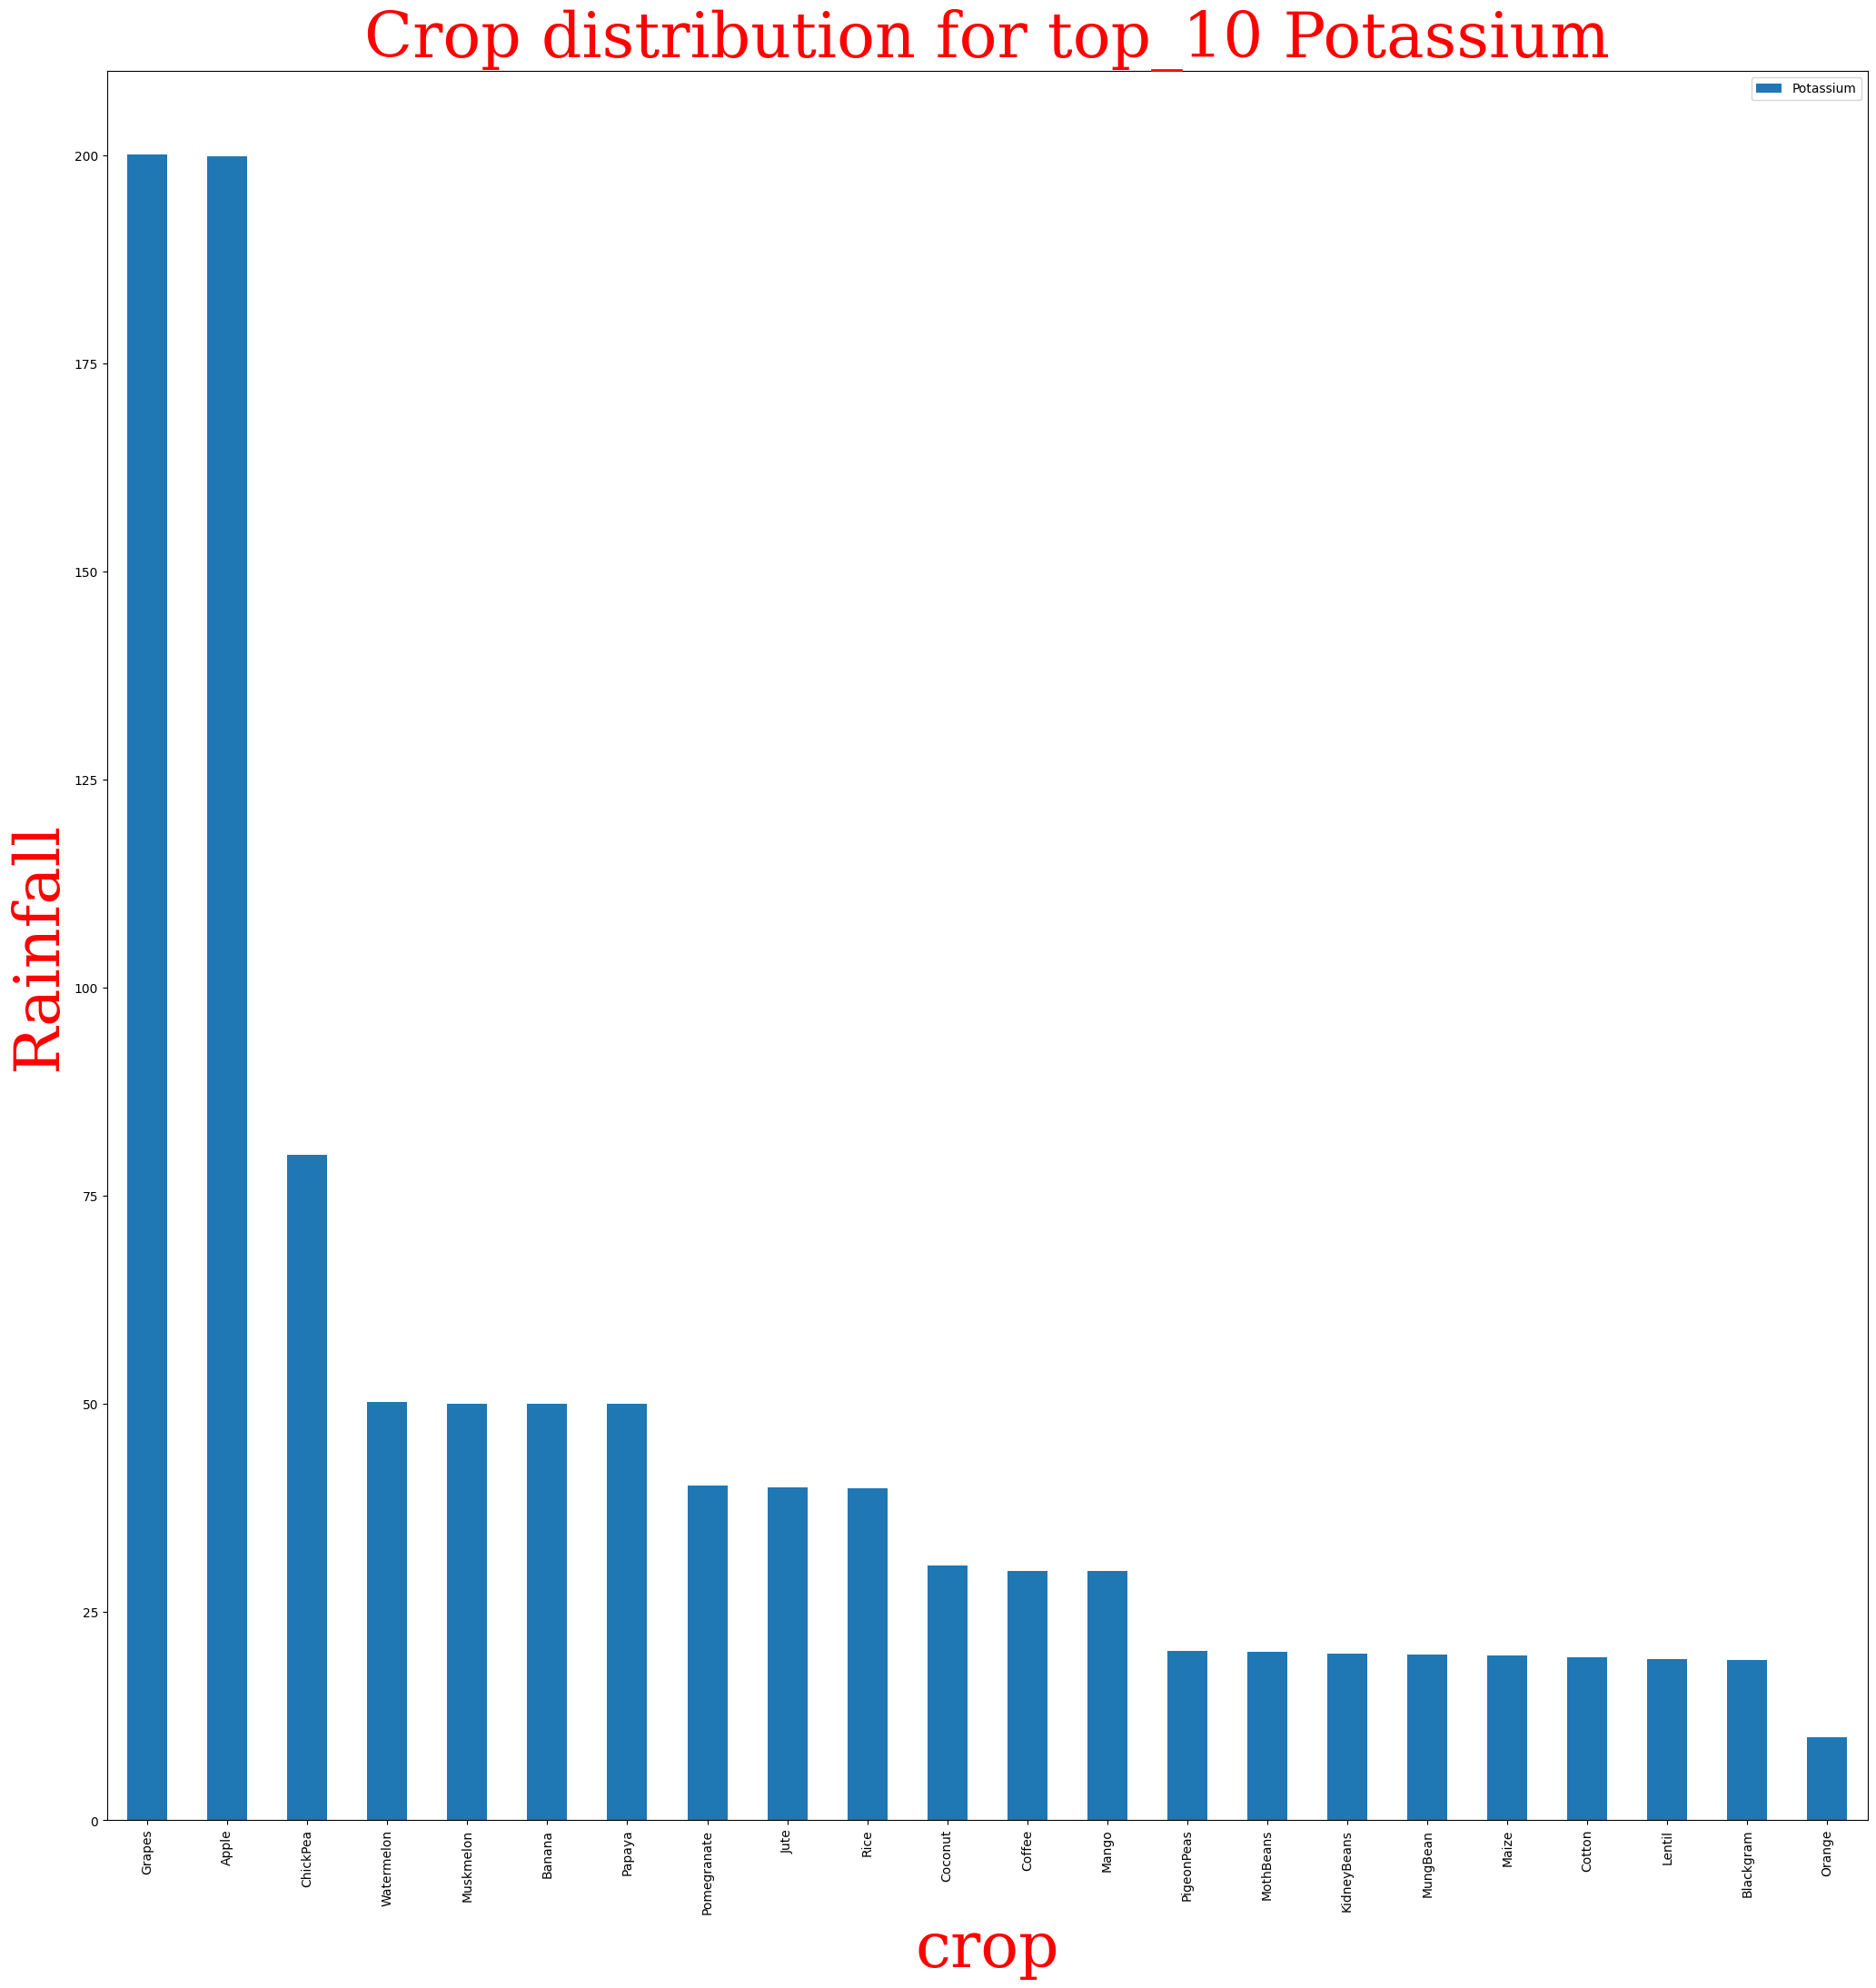

In [6]:
# observe the top_ten_crops that take Potassium :

plt.figure(figsize=(25,25))
top_10_Potassium=data.groupby(["Crop"])["Potassium"].mean().sort_values(ascending=False).plot(kind="bar",legend=True)
plt.title("Crop distribution for top_10 Potassium",fontdict=f)
plt.xlabel("crop",fontdict=f)
plt.ylabel("Rainfall",fontdict=f)

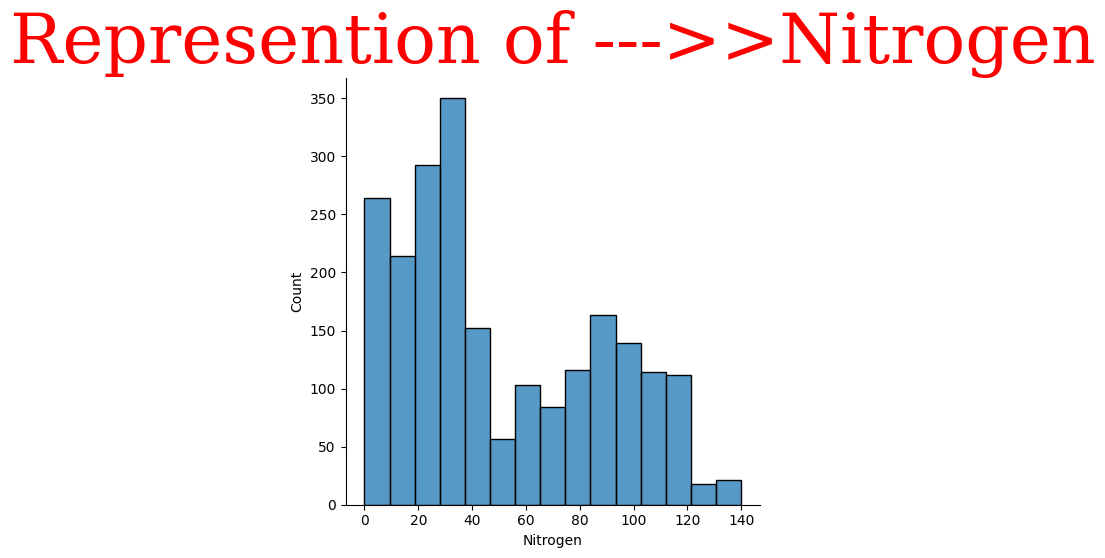

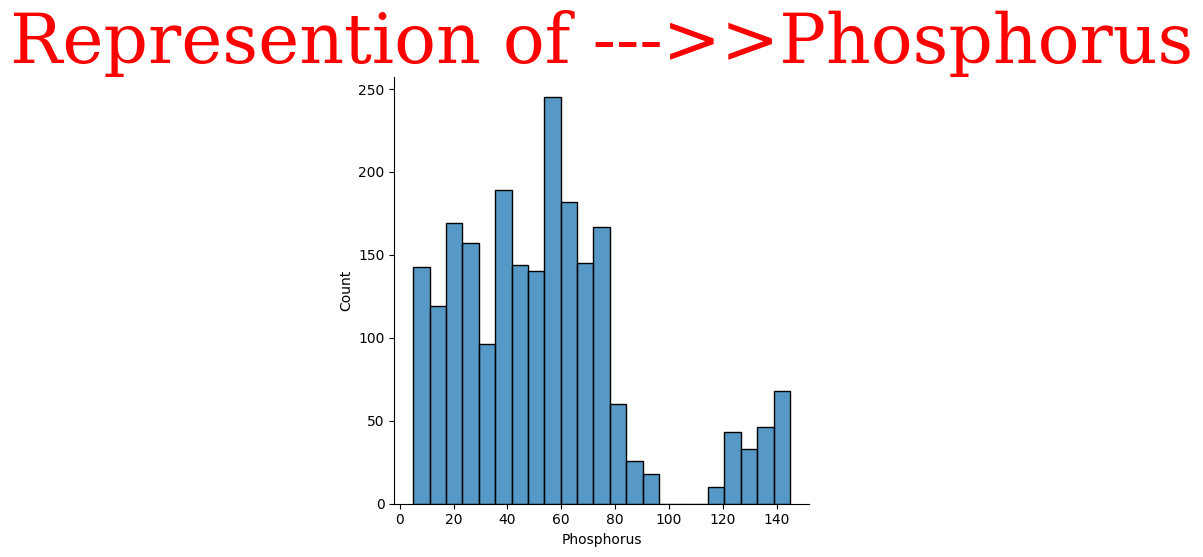

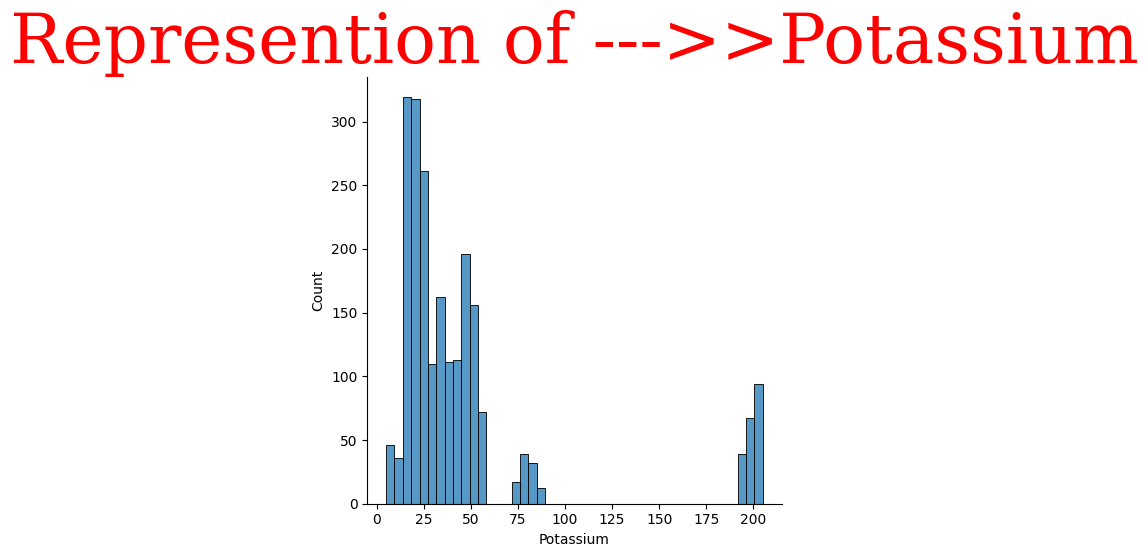

In [12]:
# observe count of every disc_col:
for col in data.select_dtypes(include="int64").columns:
    sns.displot(data[col])
    plt.title("Represention of --->>"+col,fontdict=f)

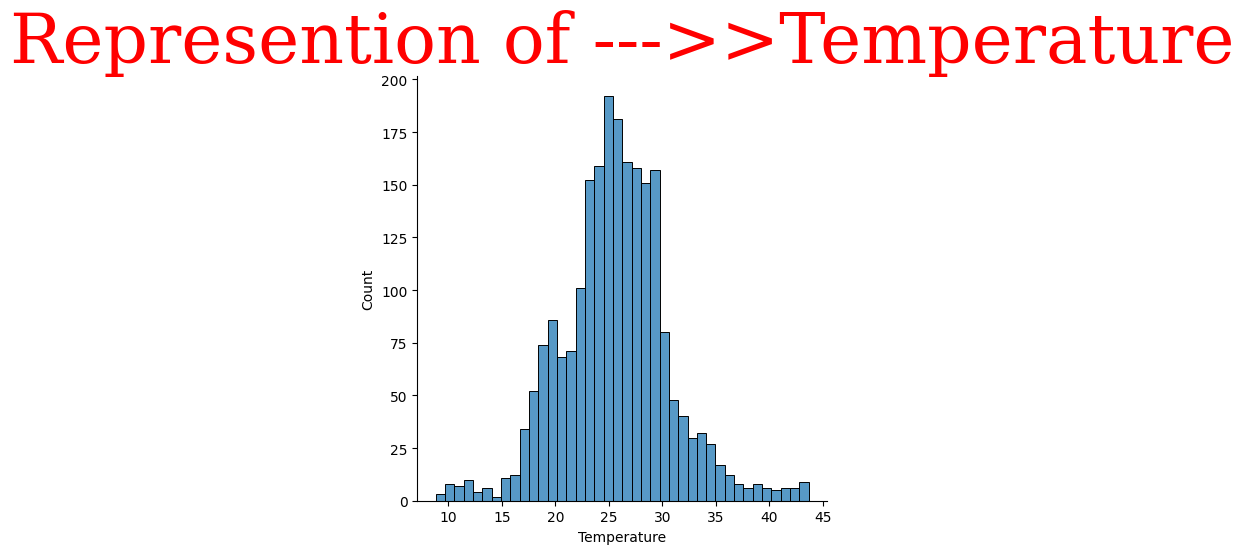

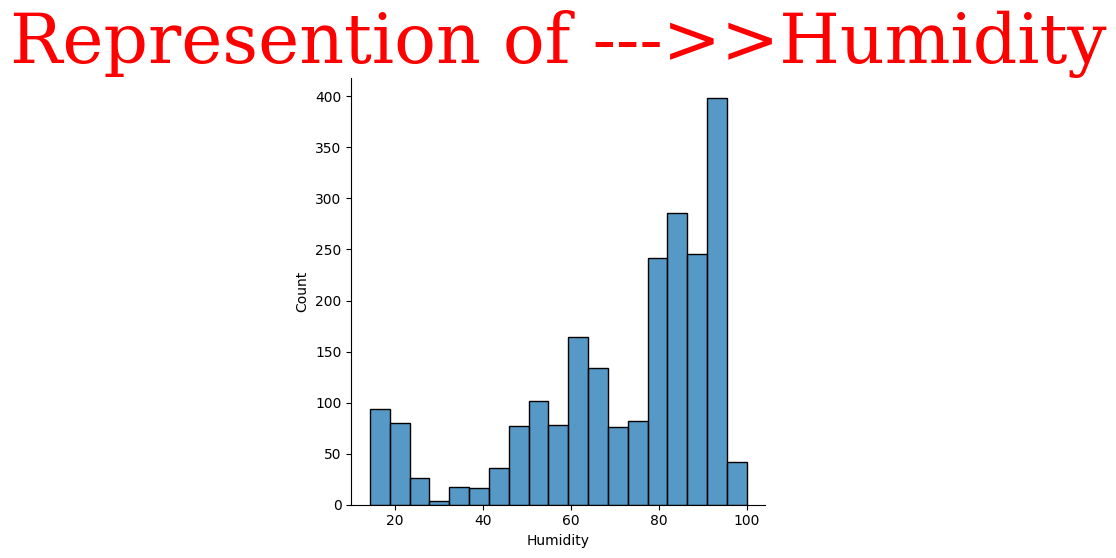

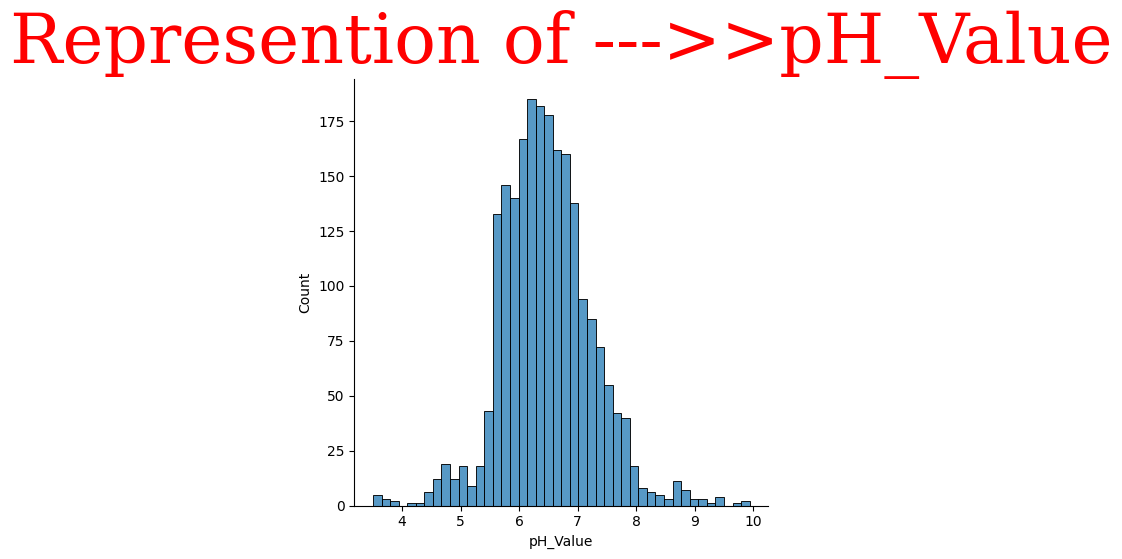

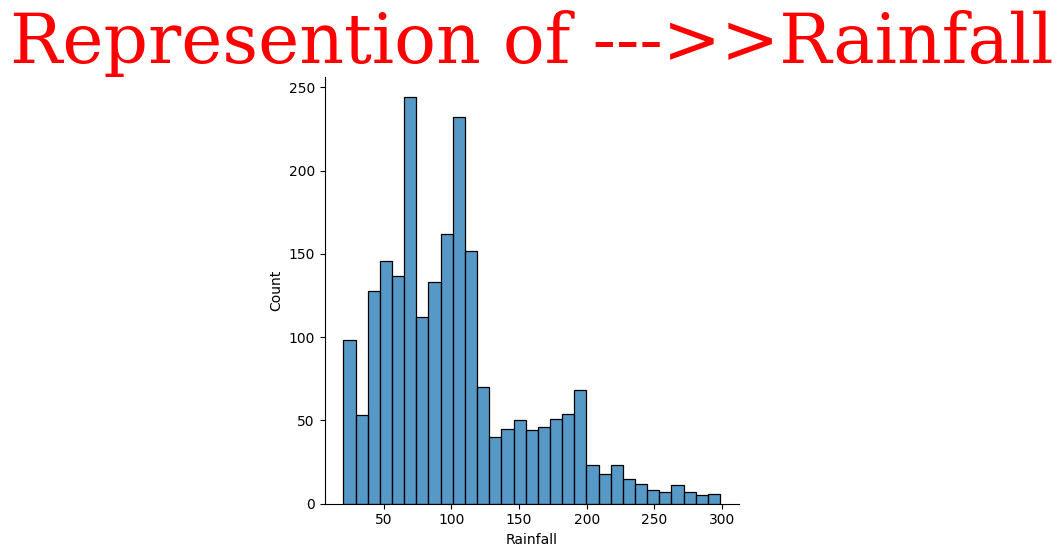

In [13]:
# observe count of every cont_col:
for col in data.select_dtypes(include="float64").columns:
    sns.displot(data[col])
    plt.title("Represention of --->>"+col,fontdict=f)

Text(0.5, 1.0, 'values of PH for every crop')

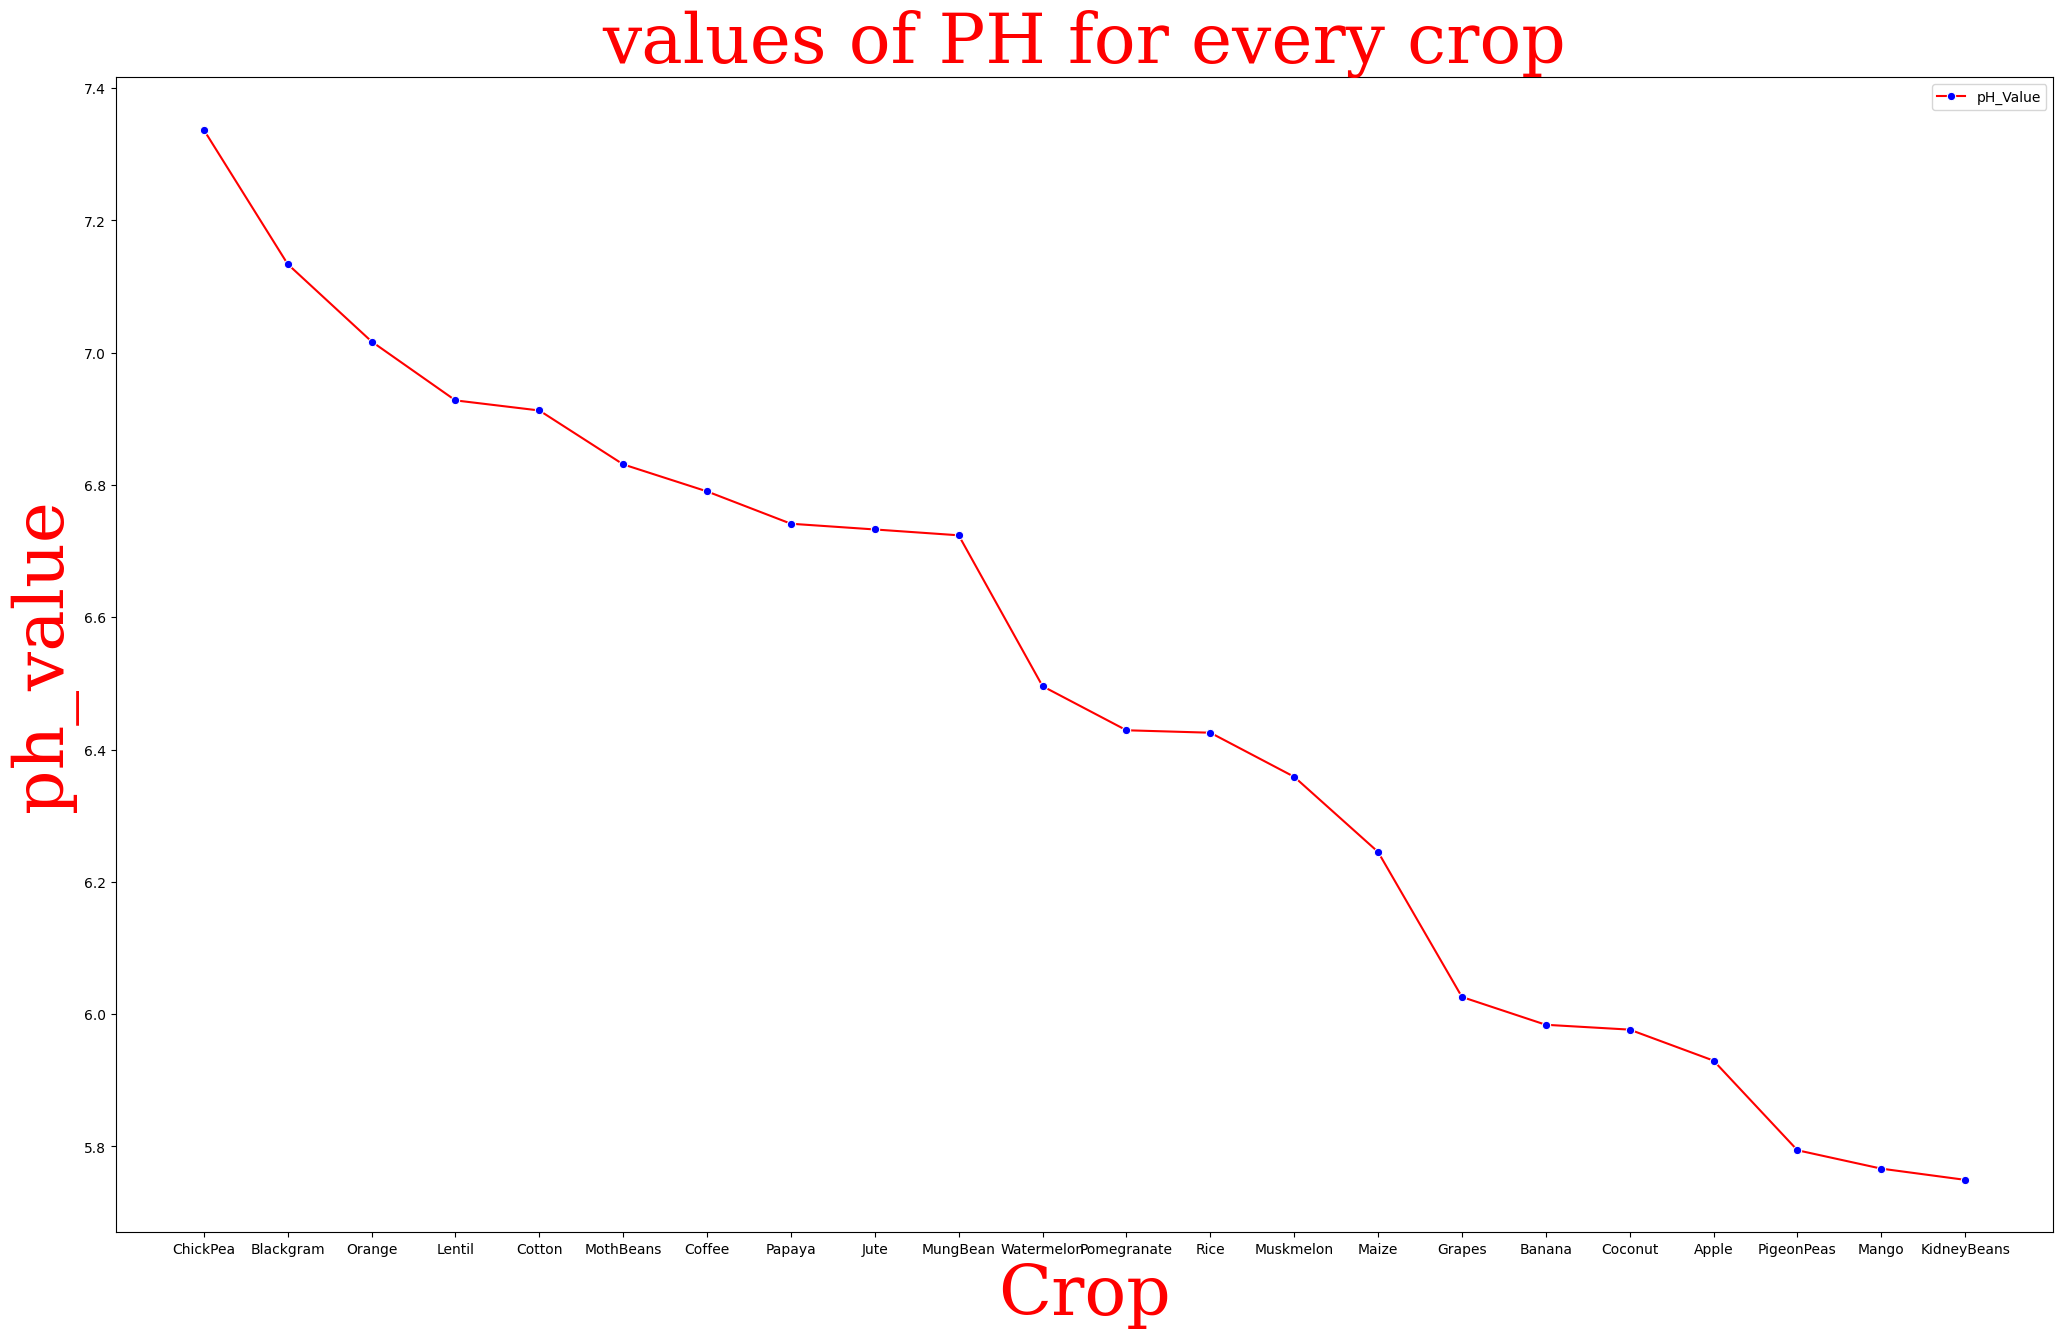

In [14]:
#observe crop variation in pH_Value

plt.figure(figsize=(25,15))
ph_value = data.groupby('Crop')['pH_Value'].mean().sort_values(ascending=False)
sns.lineplot(x=ph_value.index,y=ph_value.values,marker="o",color="r",mfc="b",label="pH_Value")
plt.xlabel('Crop',fontdict=f)
plt.ylabel('ph_value',fontdict=f)
plt.title('values of PH for every crop',fontdict=f)

<Figure size 7500x4500 with 0 Axes>

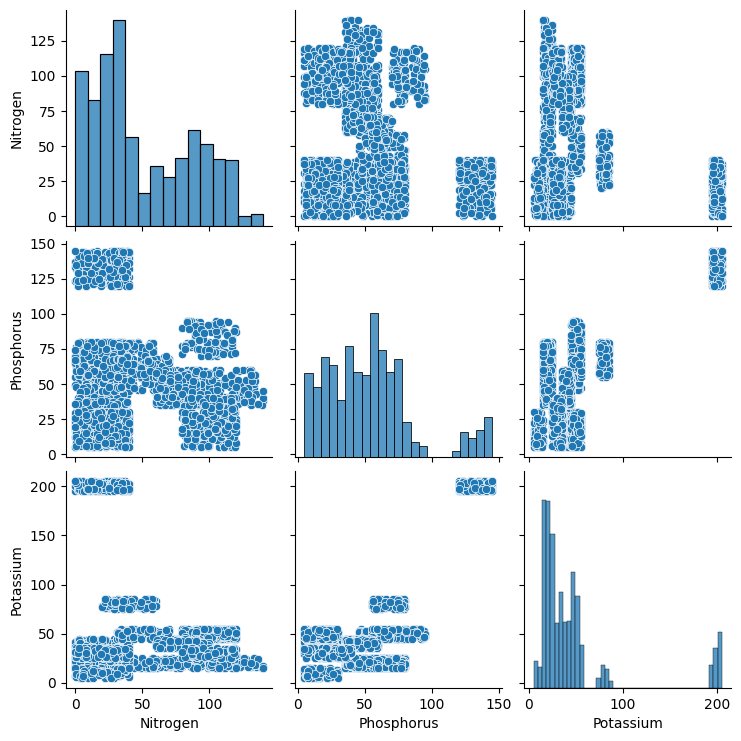

In [15]:
# make presention for evey discrete_col:

plt.figure(figsize=(25,15),dpi=300)
sns.pairplot(data.select_dtypes(include="int64"))

<Figure size 7500x4500 with 0 Axes>

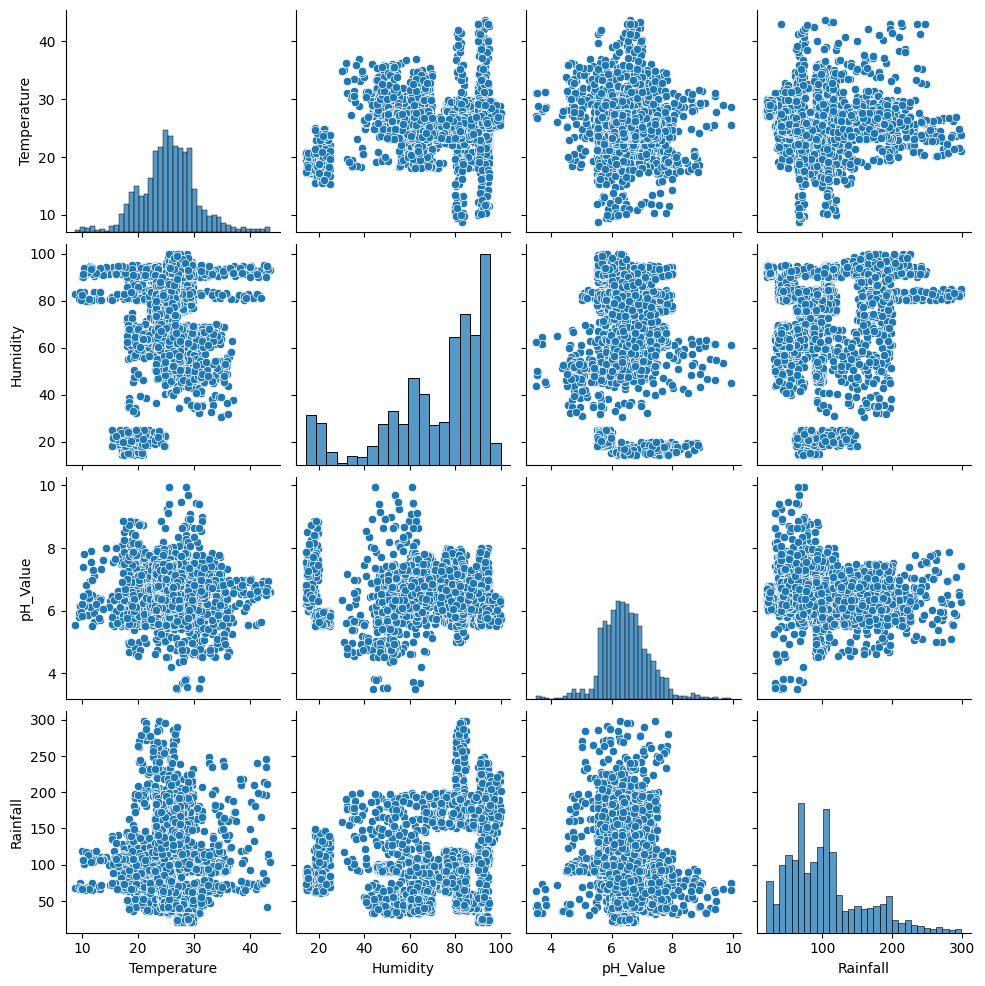

In [16]:
# make presention for evey continous_col:

plt.figure(figsize=(25,15),dpi=300)
sns.pairplot(data.select_dtypes(include="float64"))

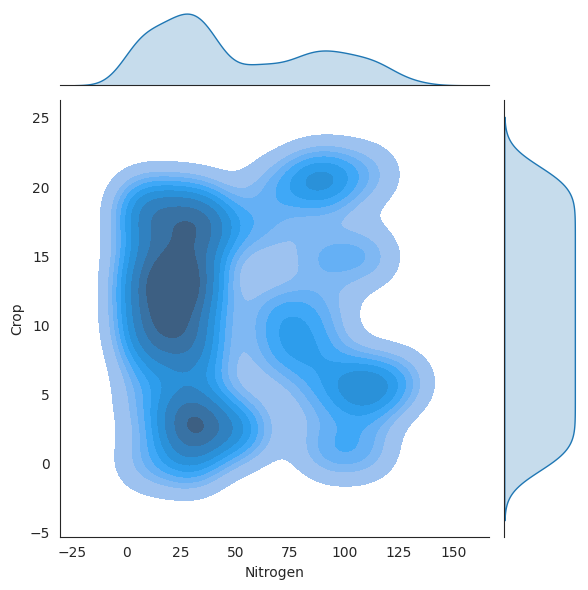

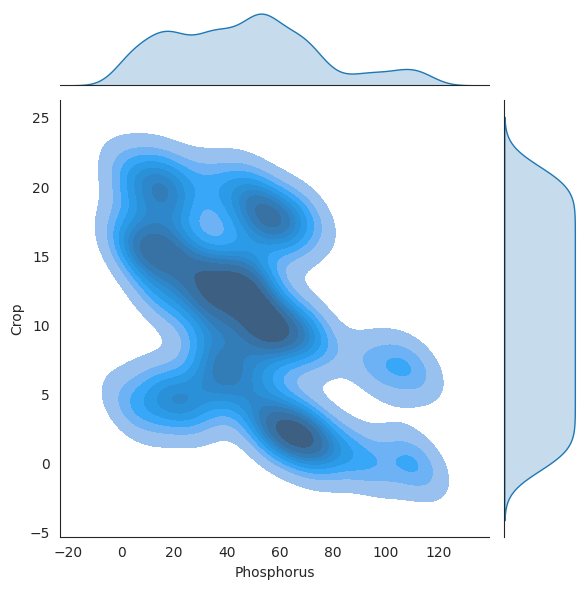

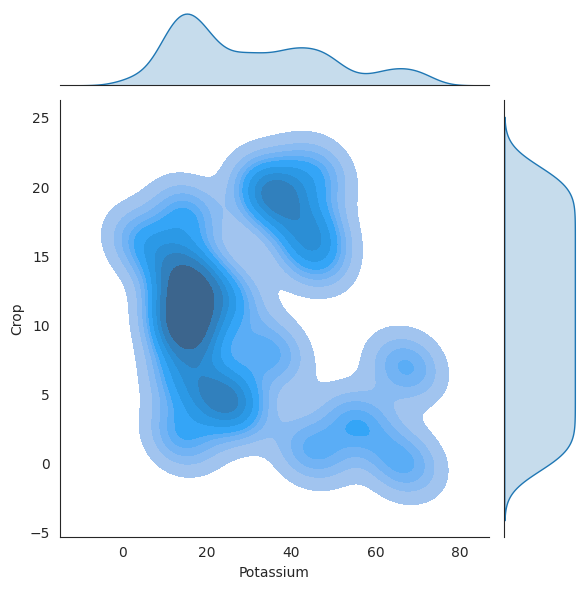

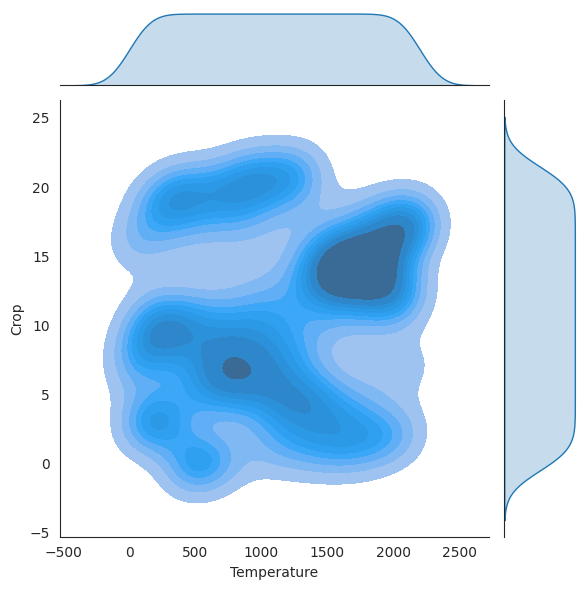

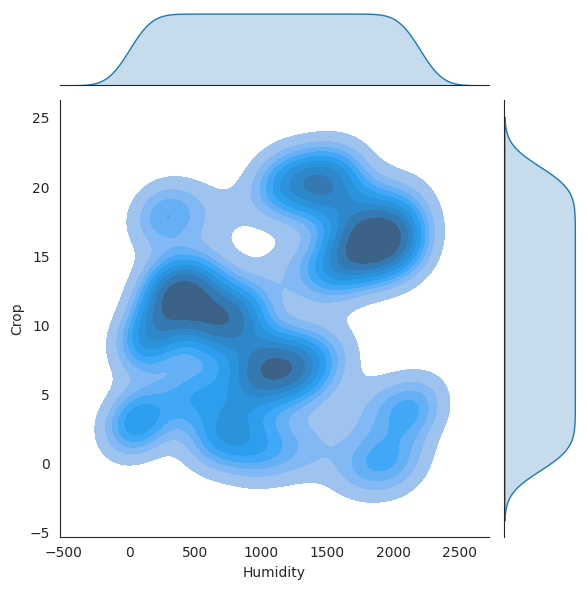

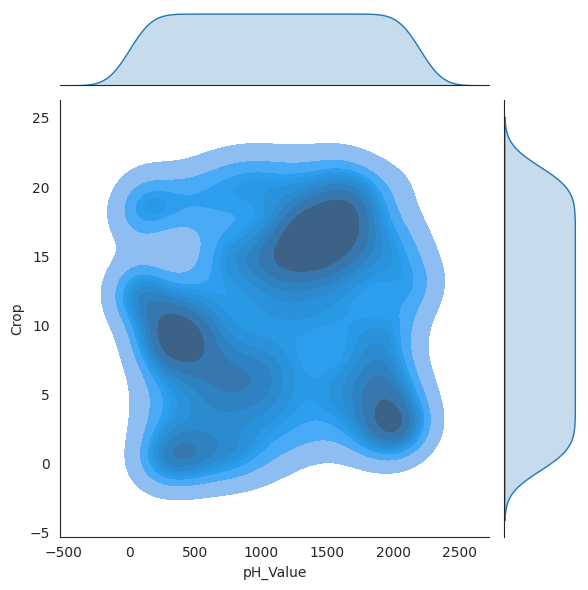

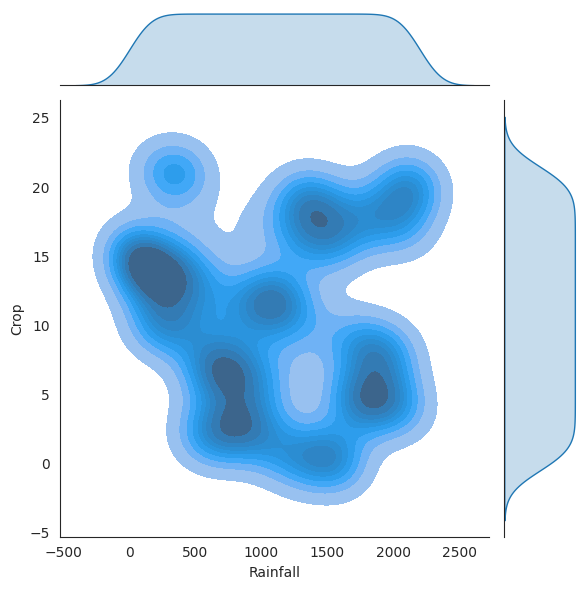

In [19]:
# observe the contor betwen the crop and every another column : 
for col in data.select_dtypes("number"):
    if col !="Crop":
      with sns.axes_style("white"):
          sns.jointplot(x=data[col],y=data["Crop"],kind="kde",fill=True)

Part4: Processing & Data Cleaning:

In [20]:
# Handle the missing Values:
#1-check the missing values:

data.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [18]:
# Convert all Categorical columns into Numerical columns :
label_encoder=LabelEncoder()
for col in data.columns:
    data[col]=label_encoder.fit_transform(data[col])
data    

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,37,38,361,1234,1211,2074,20
1,85,53,36,437,1085,1753,2128,20
2,60,50,39,583,1262,2117,2174,20
3,74,30,35,1279,1067,1710,2153,20
4,78,37,37,307,1201,2055,2171,20
...,...,...,...,...,...,...,...,...
2195,107,29,27,1328,763,1523,1920,5
2196,99,10,22,1442,483,666,1666,5
2197,118,28,25,789,793,1012,1895,5
2198,117,27,29,1237,387,1493,1663,5


In [21]:
# fill the null values  if found:

# Load your dataset into a pandas dataframe
df = data

# Fill null values in numeric columns with the median of the column
numeric_cols = df.select_dtypes("number").columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill null values in object columns with the mode of the column
object_cols = df.select_dtypes(include=['object']).columns
df[object_cols] = df[object_cols].fillna(df[object_cols].mode())


In [22]:
# VaraianceThreshold:
selector=VarianceThreshold(threshold=0.01)
selector.fit(data.select_dtypes("number"))

VarianceThreshold(threshold=0.01)

In [23]:
num_cols=data.select_dtypes("number").columns

In [24]:
selector.get_support(indices=True)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [25]:
num_cols[selector.get_support(indices=True)]

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop'],
      dtype='object')

In [26]:
class Var_Selector(BaseEstimator,TransformerMixin):
    
    def __init__(self,num_cols):
        self.num_cols=None
    def fit(self,data):
        self.num_cols=data.select_dtypes("number").columns
        return self
    def transform(self,data):
        selector=VarianceThreshold(threshold=0.01)
        selector.fit(data[self.num_cols])
        
        removed_cols=[column for column in self.num_cols if column not in \
                     self.num_cols[selector.get_support(indices=True)]]
        data=data.drop(columns=removed_cols)
        
        # remove high-low cardinality categorical:-
        
        removed_cols=data.nunique()[((data.nunique()==1)|data.nunique()==len(data))].index
        
        return data.drop(columns=removed_cols)

In [27]:
transform=Var_Selector(data)
transform.fit(data)
transform.transform(data)


,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,37,38,361,1234,1211,2074,20
1,85,53,36,437,1085,1753,2128,20
2,60,50,39,583,1262,2117,2174,20
3,74,30,35,1279,1067,1710,2153,20
4,78,37,37,307,1201,2055,2171,20
...,...,...,...,...,...,...,...,...
2195,107,29,27,1328,763,1523,1920,5
2196,99,10,22,1442,483,666,1666,5
2197,118,28,25,789,793,1012,1895,5
2198,117,27,29,1237,387,1493,1663,5


In [28]:
# Check if there are aduplicated values in the data:
df=data
duplicated_features=df.duplicated().sum()
print("Number of duplicates ----->>> ",duplicated_features)

Number of duplicates ----->>>  0


In [29]:
# drop the duplicates values if found any :
data.drop(duplicated_features)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
1,85,53,36,437,1085,1753,2128,20
2,60,50,39,583,1262,2117,2174,20
3,74,30,35,1279,1067,1710,2153,20
4,78,37,37,307,1201,2055,2171,20
5,69,32,37,593,1354,1782,2163,20
...,...,...,...,...,...,...,...,...
2195,107,29,27,1328,763,1523,1920,5
2196,99,10,22,1442,483,666,1666,5
2197,118,28,25,789,793,1012,1895,5
2198,117,27,29,1237,387,1493,1663,5


In [30]:
# Calculate the correlations by using differnt methods :
# 1- General_method:

correlation=data.select_dtypes("number").corr()
correlation

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
Nitrogen,1.000000,-0.212264,0.119407,0.008836,0.074798,0.120538,0.004242,-0.030609
Phosphorus,-0.212264,1.000000,0.408920,-0.155949,-0.213053,-0.161855,-0.024382,-0.491694
Potassium,0.119407,0.408920,1.000000,-0.130851,0.281805,-0.162768,0.023319,-0.204267
Temperature,0.008836,-0.155949,-0.130851,1.000000,0.124172,0.027754,-0.152028,0.100340
Humidity,0.074798,-0.213053,0.281805,0.124172,1.000000,-0.007281,0.100731,0.181885
pH_Value,0.120538,-0.161855,-0.162768,0.027754,-0.007281,1.000000,-0.151280,0.047107
Rainfall,0.004242,-0.024382,0.023319,-0.152028,0.100731,-0.151280,1.000000,-0.059979
Crop,-0.030609,-0.491694,-0.204267,0.100340,0.181885,0.047107,-0.059979,1.000000


In [31]:
# 2-spearman_method

sperman=data.select_dtypes("number").corr(method="spearman")
sperman

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
Nitrogen,1.000000,-0.162625,0.208248,0.022390,0.061113,0.141879,0.011411,-0.041745
Phosphorus,-0.162625,1.000000,0.195161,-0.137618,-0.309246,-0.119063,-0.032457,-0.472171
Potassium,0.208248,0.195161,1.000000,-0.081082,0.279493,-0.155351,0.069903,-0.148028
Temperature,0.022390,-0.137618,-0.081082,1.000000,0.124172,0.027754,-0.152028,0.100340
Humidity,0.061113,-0.309246,0.279493,0.124172,1.000000,-0.007281,0.100731,0.181885
pH_Value,0.141879,-0.119063,-0.155351,0.027754,-0.007281,1.000000,-0.151280,0.047107
Rainfall,0.011411,-0.032457,0.069903,-0.152028,0.100731,-0.151280,1.000000,-0.059979
Crop,-0.041745,-0.472171,-0.148028,0.100340,0.181885,0.047107,-0.059979,1.000000


In [32]:
# 3-kendall method :

kendall=data.select_dtypes("number").corr(method="kendall")
kendall

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
Nitrogen,1.000000,-0.126438,0.134273,0.018003,0.043503,0.089981,0.010675,-0.026826
Phosphorus,-0.126438,1.000000,0.112858,-0.093892,-0.209444,-0.069890,-0.018331,-0.339739
Potassium,0.134273,0.112858,1.000000,-0.055338,0.190514,-0.106470,0.054646,-0.103721
Temperature,0.018003,-0.093892,-0.055338,1.000000,0.078116,0.020666,-0.089448,0.072208
Humidity,0.043503,-0.209444,0.190514,0.078116,1.000000,-0.013975,0.062094,0.107047
pH_Value,0.089981,-0.069890,-0.106470,0.020666,-0.013975,1.000000,-0.096859,0.028587
Rainfall,0.010675,-0.018331,0.054646,-0.089448,0.062094,-0.096859,1.000000,-0.054291
Crop,-0.026826,-0.339739,-0.103721,0.072208,0.107047,0.028587,-0.054291,1.000000


In [33]:
# 4-pearson:
pearson=data.select_dtypes("number").corr(method="pearson")
pearson

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
Nitrogen,1.000000,-0.212264,0.119407,0.008836,0.074798,0.120538,0.004242,-0.030609
Phosphorus,-0.212264,1.000000,0.408920,-0.155949,-0.213053,-0.161855,-0.024382,-0.491694
Potassium,0.119407,0.408920,1.000000,-0.130851,0.281805,-0.162768,0.023319,-0.204267
Temperature,0.008836,-0.155949,-0.130851,1.000000,0.124172,0.027754,-0.152028,0.100340
Humidity,0.074798,-0.213053,0.281805,0.124172,1.000000,-0.007281,0.100731,0.181885
pH_Value,0.120538,-0.161855,-0.162768,0.027754,-0.007281,1.000000,-0.151280,0.047107
Rainfall,0.004242,-0.024382,0.023319,-0.152028,0.100731,-0.151280,1.000000,-0.059979
Crop,-0.030609,-0.491694,-0.204267,0.100340,0.181885,0.047107,-0.059979,1.000000


Text(0.5, 1.0, 'Correlation_HEatmap_MAtrix')

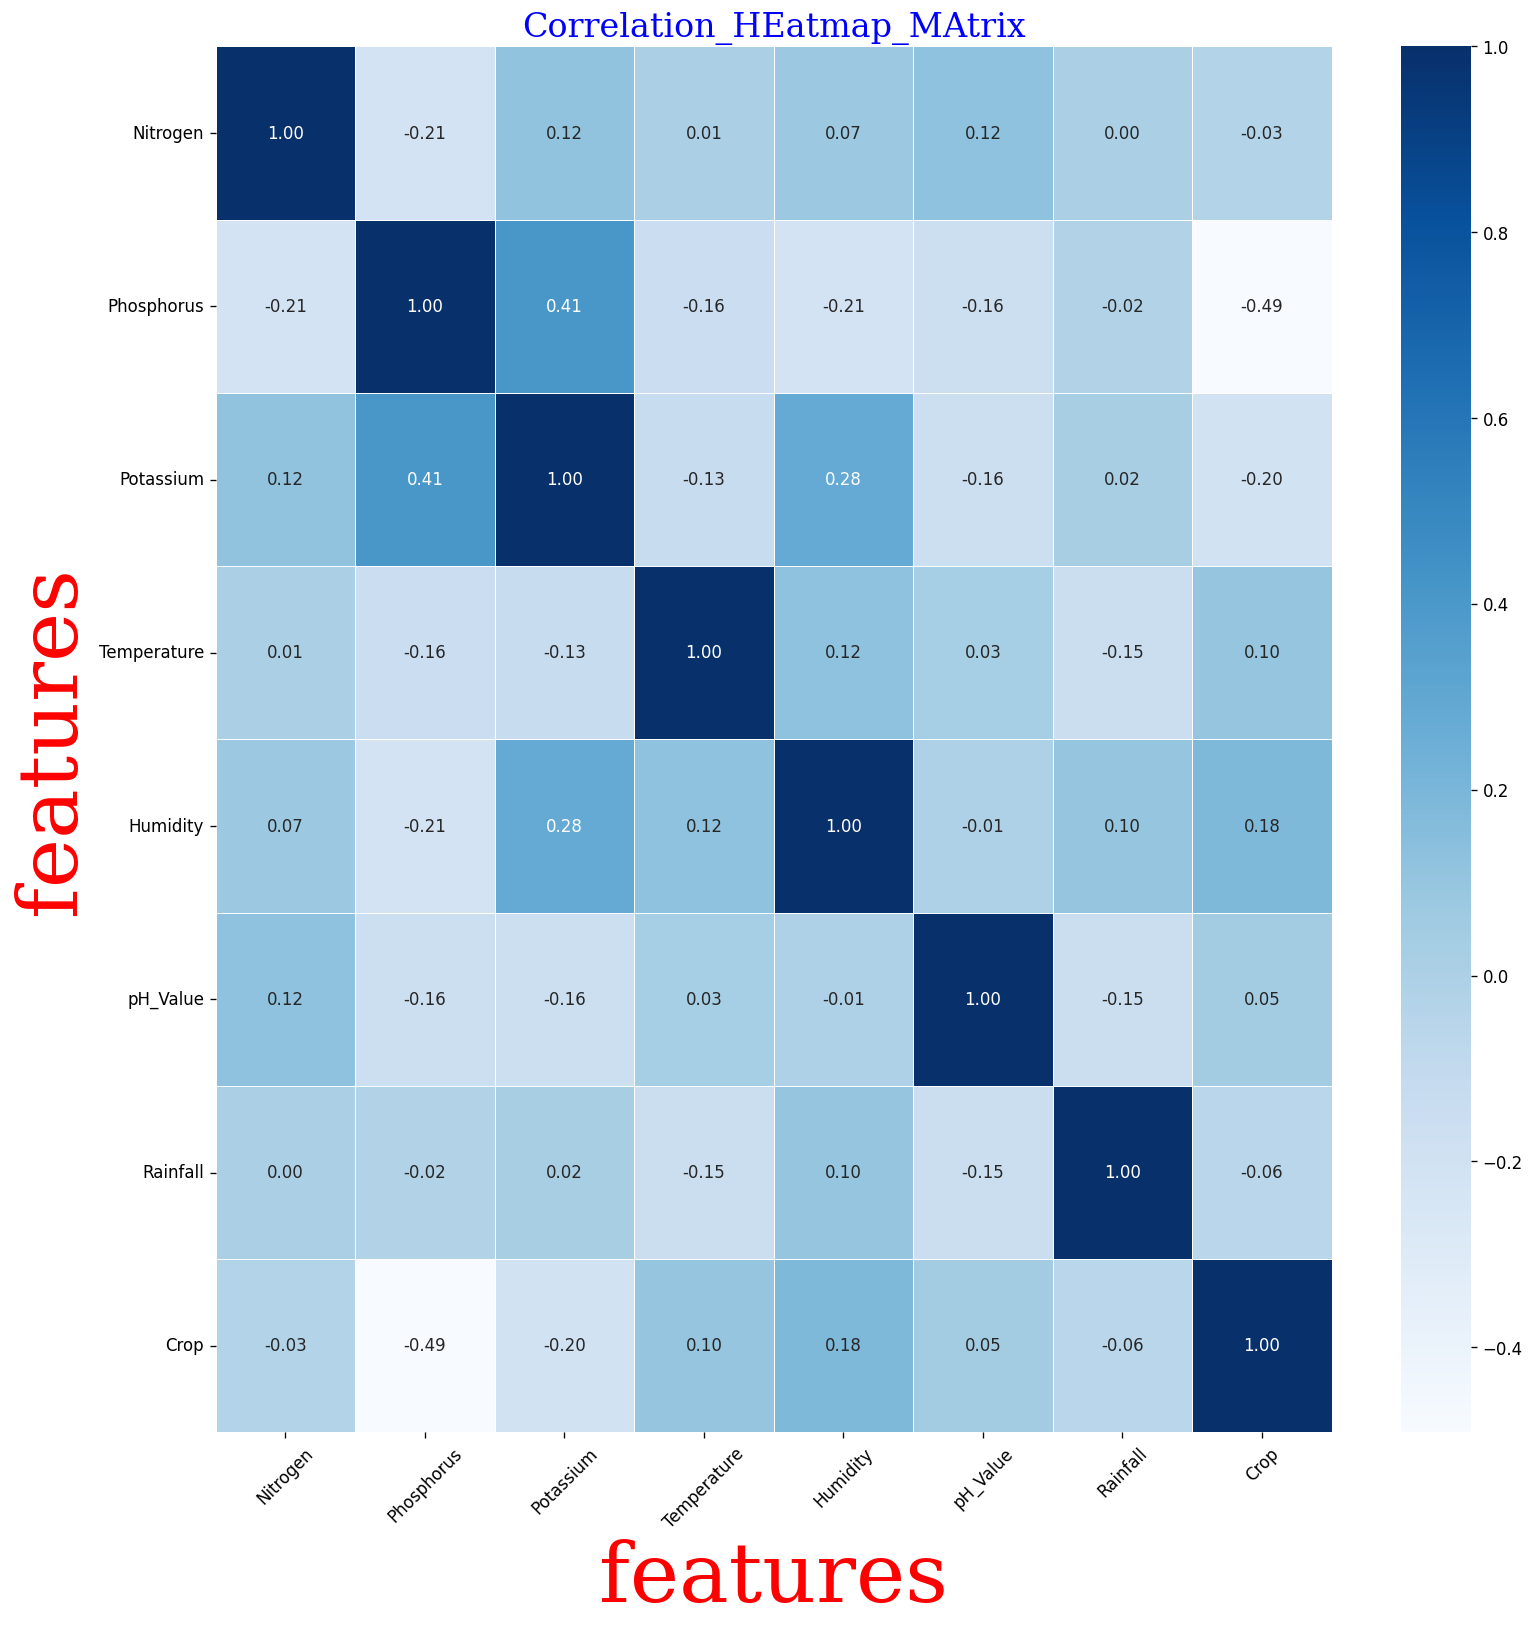

In [34]:
# 5-plot the heatmap_Correlation_MatRix:
f1={"family":"serif","size":20,"color":"b"}
plt.figure(figsize=(15,15),dpi=120)
sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt="0.2f",cmap='Blues',linewidths=0.5)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("features",fontdict=f)
plt.ylabel("features",fontdict=f)
plt.title("Correlation_HEatmap_MAtrix",fontdict=f1)


In [35]:
# Extract the most important Numerical Features:

fs=SelectKBest(score_func=f_classif,k=5)
fs.fit(data.drop(columns="Crop").select_dtypes("number").fillna(0),data["Crop"])

SelectKBest(k=5)

In [36]:
print(["{:10f}".format(p) for p in  fs.pvalues_])

['  0.000000', '  0.000000', '  0.000000', '  0.000000', '  0.000000', '  0.000000', '  0.000000']


In [37]:
print(["{:10f}".format(p) for p in fs.scores_])

['900.202553', '1334.083766', '3359.822385', '154.945769', '1818.066479', ' 89.706823', '794.106950']


In [38]:
featurs_values=pd.DataFrame(fs.pvalues_)
features_scores=pd.DataFrame(fs.scores_)
features=pd.DataFrame(data.drop(columns="Crop").select_dtypes("number").fillna(0).columns)


In [39]:
feature_score=pd.concat([featurs_values,features_scores,features],axis=1)
feature_score.columns=["pvalues","score","input"]
feature_score

,pvalues,score,input
0,0.000000e+00,900.202553,Nitrogen
1,0.000000e+00,1334.083766,Phosphorus
2,0.000000e+00,3359.822385,Potassium
3,0.000000e+00,154.945769,Temperature
4,0.000000e+00,1818.066479,Humidity
5,7.892367e-276,89.706823,pH_Value
6,0.000000e+00,794.106950,Rainfall


In [40]:
# Extract the most important Categorical Features :
from sklearn.feature_selection import mutual_info_classif

mic=SelectKBest(score_func=mutual_info_classif,k=5)
mic.fit(data.drop(columns="Crop").select_dtypes("number").fillna(0),data["Crop"])

features_MI_scores=pd.Series(mic.scores_,index=data.drop(columns="Crop").select_dtypes("number").fillna(0).columns)
features_MI_scores.sort_values(ascending=True)

pH_Value       0.687041
Nitrogen       0.976391
Temperature    1.016919
Phosphorus     1.291505
Rainfall       1.644062
Potassium      1.650065
Humidity       1.720373
dtype: float64

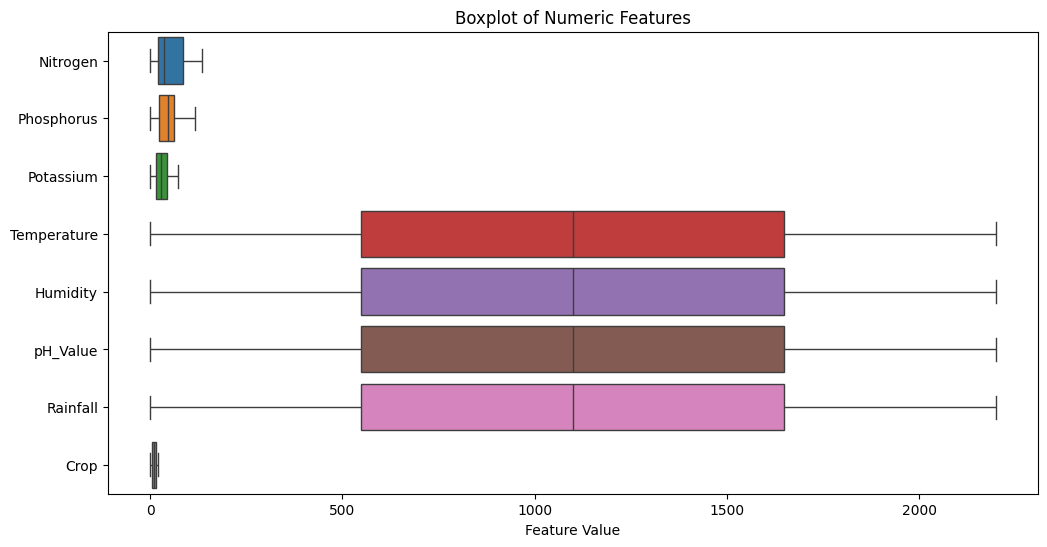

In [41]:
# Check the outliers : 
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.select_dtypes("number"), orient='h')
plt.title('Boxplot of Numeric Features')
plt.xlabel('Feature Value')
plt.show()


Text(0.5, 1.0, 'Distribusi Nitrogen')

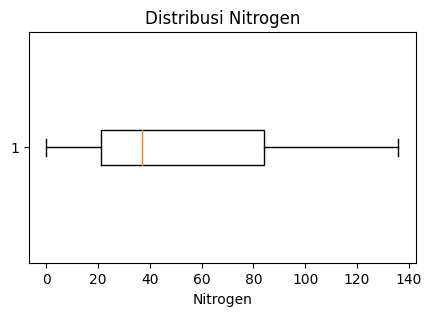

In [42]:
#boxplot for Nitrogen,NO outlier

plt.figure(figsize=(5,3))
plt.boxplot(data['Nitrogen'],vert=False)
plt.xlabel('Nitrogen')
plt.title('Distribusi Nitrogen')


Text(0.5, 1.0, 'Distribusi Temperature')

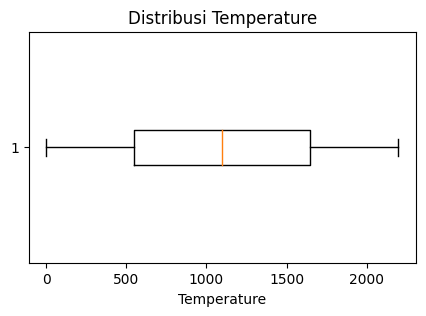

In [43]:
# boxplot for Temperature, No outlier
plt.figure(figsize=(5,3))
plt.boxplot(data['Temperature'],vert=False)
plt.xlabel('Temperature')
plt.title('Distribusi Temperature')


Text(0.5, 1.0, 'Distribusi Potassium')

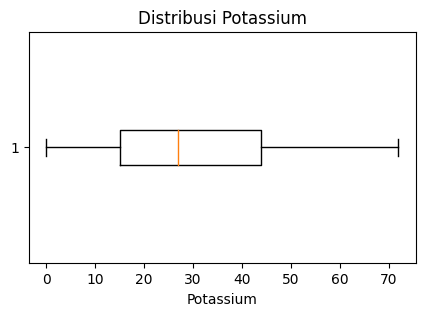

In [44]:
# boxplot for Potassium,may be  outlier
plt.figure(figsize=(5,3))
plt.boxplot(data['Potassium'],vert=False)
plt.xlabel('Potassium')
plt.title('Distribusi Potassium')


upper_limit :  84.72789872732548
lower_limit :  -23.429716909143657
Mean Value :  30.64909090909091
Median Value :  27.0
1st Standard Deviation :  18.026269272744855


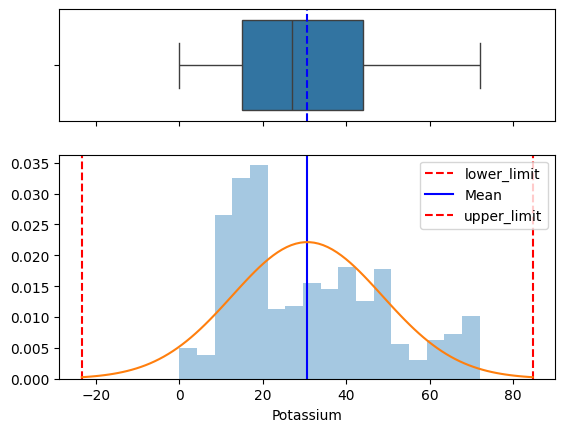

In [45]:
#calculate the outlier ,upper,lowwer limits ,mean_value,median_vale,standard_devation:
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 1)})

mean=data.Potassium.mean()
std = data.Potassium.std()
median = data.Potassium.median()
upper_limit = mean + std*3
lower_limit = mean - std*3
print("upper_limit : ", upper_limit)
print("lower_limit : ",lower_limit)

sns.boxplot(x=data["Potassium"], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')


sns.distplot(data["Potassium"], ax=ax_hist,kde=False,norm_hist=True)
ax_hist.axvline(lower_limit, color='r', linestyle='--')
ax_hist.axvline(mean, color='b', linestyle='-')
ax_hist.axvline(upper_limit, color='r', linestyle='--')



plt.legend({'Mean':mean})

ax_box.set(xlabel='')

x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, norm.pdf(x, mean, std))
plt.legend({"lower_limit":lower_limit,'Mean':mean,'upper_limit':upper_limit})
print("Mean Value : ",mean)
print("Median Value : ",median)
print("1st Standard Deviation : ",std)

plt.show()

PART OF MACHINE LEARNING , MODELS THAT WE USE --->> (RandomForet,Svm,LogisticRegression)

In [46]:
# Divide the data:

x=data.drop(columns="Crop",axis=1)
y=data["Crop"]
print(np.shape(x),np.shape(y))

(2200, 7) (2200,)


In [47]:
# train the data:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)
print(np.shape(x_train),np.shape(x_test))
print(np.shape(y_train),np.shape(y_test))




(1540, 7) (660, 7)
(1540,) (660,)


In [48]:
# RandomForest model:
RC1=RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=5,n_estimators=100)
RC1.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=42)

In [49]:
RC1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [50]:
#predict the model:

y_predict=RC1.predict(x_test)
y_predict[:10]

array([ 9,  2,  2,  8,  8,  9, 17, 12,  5, 11])

In [51]:
# compute the accuracy:
print(f"accuracy ---->>> {RC1.score(x_test,y_test)*100:0.2f}%")

accuracy ---->>> 98.33%


In [52]:
#improve from accuracy:
np.random.seed()
for i in range(10,110,10):
    print(f"at n_estimators= {i} n_estimators")
    RC2=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"accuracy={RC2.score(x_test,y_test)*100:0.2f}%")


at n_estimators= 10 n_estimators
accuracy=99.39%
at n_estimators= 20 n_estimators
accuracy=99.70%
at n_estimators= 30 n_estimators
accuracy=99.24%
at n_estimators= 40 n_estimators
accuracy=99.55%
at n_estimators= 50 n_estimators
accuracy=99.55%
at n_estimators= 60 n_estimators
accuracy=99.39%
at n_estimators= 70 n_estimators
accuracy=99.70%
at n_estimators= 80 n_estimators
accuracy=99.39%
at n_estimators= 90 n_estimators
accuracy=99.39%
at n_estimators= 100 n_estimators
accuracy=99.55%


In [53]:
# Hypothesis  & Confusion_matrix :
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_predict)
tp,tn,fp,fn= cm[1,1],cm[0,0],cm[1,0],cm[0,1]
print("True positve prediction :",tp)
print("True Negative predicion :",tn)
print("False positve prediction:",fp)
print("False Negative prediction:",fn)

# Report:
class_report = classification_report(y_test, y_predict)
print("Classification Report:\n", class_report)

True positve prediction : 30
True Negative predicion : 30
False positve prediction: 0
False Negative prediction: 0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       0.88      0.97      0.92        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.94      1.00      0.97        30
           9       0.97      1.00      0.98        30
          10       1.00      0.93      0.97        30
          11       0.97      1.00      0.98        30
          12       1.00      1.00      1.00        30
          13       0.93      0.87      0.90        30
          14       1.00      1.00      1.00       

In [54]:
# Build svm Model :
SV=svm.SVC(random_state=42,kernel="linear" )
SV.fit(x_train,y_train)


SVC(kernel='linear', random_state=42)

In [55]:
y_pred=SV.predict(x_test)
y_pred[:10]

array([ 9, 13,  2,  8,  8,  9, 17, 12,  5, 11])

In [56]:
#Evalute the model:
print("Mean Square Error --->>",metrics.mean_squared_error(y_test,y_pred)*100)
print("accuracy --->>>",SV.score(x_test,y_test)*100)

Mean Square Error --->> 127.42424242424242
accuracy --->>> 98.33333333333333


In [57]:
#Evaluation Model (matrices):

print(f"accuracy:{metrics.accuracy_score(y_test,y_pred)*100:0.2f}%")

print("*"*50)

cm=metrics.confusion_matrix(y_test,y_pred)
tp,tn,fp,fn= cm[1,1],cm[0,0],cm[1,0],cm[0,1]

print("True positve prediction :",tp)
print("True Negative predicion :",tn)
print("False positve prediction:",fp)
print("False Negative prediction:",fn)


print("*"*50)

class_report=classification_report(y_test, y_pred)
print("Classification_report --->> \n",class_report)


accuracy:98.33%
**************************************************
True positve prediction : 30
True Negative predicion : 30
False positve prediction: 0
False Negative prediction: 0
**************************************************
Classification_report --->> 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.97      1.00      0.98        30
           2       0.86      1.00      0.92        30
           3       1.00      0.97      0.98        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       1.00      0.93      0.97        30
           7       1.00      1.00      1.00        30
           8       0.91      0.97      0.94        30
           9       0.97      1.00      0.98        30
          10       1.00      1.00      1.00        30
          11       1.00      0.93      0.97        30
          12       1.00      1.00 

In [58]:
# create model1 (LogisticRegression) --->> Classification

lg=LogisticRegression(random_state=42,multi_class='auto',n_jobs=-1)
lg.fit(x_train,y_train)


LogisticRegression(n_jobs=-1, random_state=42)

In [59]:
lg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [60]:
y_pr=lg.predict(x_test)
y_pr[:15]

array([ 9,  2,  2,  8,  8,  9, 17, 12,  5, 11,  8, 17,  4, 16, 12])

In [61]:
#Evalute the model:
print("Mean Square Error--->>",metrics.mean_squared_error(y_test,y_pr)*100)
print("accuracy --->>>",lg.score(x_test,y_test)*100)

Mean Square Error--->> 1199.2424242424242
accuracy --->>> 82.42424242424242


In [62]:
#Evaluation Model (matrices):

print(f"accuracy:{metrics.accuracy_score(y_test,y_pr)*100:0.2f}%")

print("*"*50)

cm=metrics.confusion_matrix(y_test,y_pr)
tp,tn,fp,fn= cm[1,1],cm[0,0],cm[1,0],cm[0,1]

print("True positve prediction :",tp)
print("True Negative predicion :",tn)
print("False positve prediction:",fp)
print("False Negative prediction:",fn)


print("*"*50)

class_report=classification_report(y_test, y_pr)
print("Classification_report --->> \n",class_report)


accuracy:82.42%
**************************************************
True positve prediction : 25
True Negative predicion : 30
False positve prediction: 0
False Negative prediction: 0
**************************************************
Classification_report --->> 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.74      0.83      0.78        30
           2       0.82      0.90      0.86        30
           3       1.00      0.93      0.97        30
           4       0.94      0.97      0.95        30
           5       1.00      0.93      0.97        30
           6       0.70      0.87      0.78        30
           7       0.91      1.00      0.95        30
           8       0.59      0.57      0.58        30
           9       0.81      0.73      0.77        30
          10       0.81      0.70      0.75        30
          11       0.63      0.40      0.49        30
          12       0.97      1.00 

Deep learning : Build Model BY using tensorflow

In [63]:
# imports :
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense,Input,Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.regularizers import l2


2024-07-02 23:18:34.810352: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-02 23:18:34.811772: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-02 23:18:34.838625: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-02 23:18:34.839293: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-02 23:18:35.320874: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [64]:
# Build the model:

model=Sequential([
    Input(shape=[7]),
    
    Dense(units=128,activation="relu"),
    Dropout(0.1),
    
    Dense(units=256,activation="relu"),
    Dropout(0.2),

    Dense(units=512,activation="relu"),
    Dropout(0.3),

    Dense(units=256,activation="relu"),
    Dropout(0.2),
    
    Dense(units=1,activation="softmax")
])
model

2024-07-02 23:18:35.791736: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-02 23:18:35.792124: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [65]:
#compile:
model.compile(
    loss=BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
  )

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               1

In [67]:
model.fit(x_train,y_train,epochs=20,batch_size=35,validation_split=0.1)

Epoch 1/20
40/40 [==============================] - 1s 5ms/step - loss: -4111139.5000 - accuracy: 0.0469 - val_loss: -28807450.0000 - val_accuracy: 0.0325
Epoch 2/20
40/40 [==============================] - 0s 2ms/step - loss: -425637728.0000 - accuracy: 0.0469 - val_loss: -1756323584.0000 - val_accuracy: 0.0325
Epoch 3/20
40/40 [==============================] - 0s 2ms/step - loss: -9194740736.0000 - accuracy: 0.0469 - val_loss: -25934645248.0000 - val_accuracy: 0.0325
Epoch 4/20
40/40 [==============================] - 0s 2ms/step - loss: -76364218368.0000 - accuracy: 0.0469 - val_loss: -173635256320.0000 - val_accuracy: 0.0325
Epoch 5/20
40/40 [==============================] - 0s 2ms/step - loss: -383191089152.0000 - accuracy: 0.0469 - val_loss: -736371998720.0000 - val_accuracy: 0.0325
Epoch 6/20
40/40 [==============================] - 0s 2ms/step - loss: -1351848951808.0000 - accuracy: 0.0469 - val_loss: -2323536150528.0000 - val_accuracy: 0.0325
Epoch 7/20
40/40 [==============

In [68]:
# predict on the model:
y_predction=model.predict(x_test)
y_predction[:10]

21/21 [==============================] - 0s 751us/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [69]:
# compute min & max in the y_prediction:
print(f"the min_value for prediction --->> {np.min(y_predction)} \n the max_value for prediction --->>> {np.max(y_predction)} ")

the min_value for prediction --->> 1.0 
 the max_value for prediction --->>> 1.0 


In [70]:
#Evalute the score:

model.evaluate(x_test,y_test,verbose=2)

21/21 - 0s - loss: -2.0412e+15 - accuracy: 0.0455 - 24ms/epoch - 1ms/step


[-2041212332670976.0, 0.04545454680919647]

In [71]:
# to improve the accuracy of the model: we use the Regulized model:
# # Build Regulized model:

model_r=Sequential([
    
    Input(shape=[7]),
    
    Dense(units=128,activation="relu",kernel_regularizer=l2(0.01)),
    Dropout(0.1),
    
    Dense(units=256,activation="relu",kernel_regularizer=l2(.01)),
    Dropout(0.2),

    Dense(units=512,activation="relu",kernel_regularizer=l2(.01)),
    Dropout(0.3),

    Dense(units=256,activation="relu",kernel_regularizer=l2(.01)),
    Dropout(0.2),
    
    Dense(units=1,activation="softmax",kernel_regularizer=l2(.01)),
              ])
model_r        

In [72]:
#compile:
model_r.compile(
    loss=BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.metrics.BinaryAccuracy()],
  )

In [73]:
model_r.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1024      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               131584    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)              

In [74]:
#fit the model:
model_r.fit(x_train,y_train,epochs=20,batch_size=35,validation_split=0.1)

Epoch 1/20
40/40 [==============================] - 1s 4ms/step - loss: -3436151.0000 - binary_accuracy: 0.0469 - val_loss: -24045170.0000 - val_binary_accuracy: 0.0325
Epoch 2/20
40/40 [==============================] - 0s 2ms/step - loss: -383952032.0000 - binary_accuracy: 0.0469 - val_loss: -1596840192.0000 - val_binary_accuracy: 0.0325
Epoch 3/20
40/40 [==============================] - 0s 2ms/step - loss: -8458253824.0000 - binary_accuracy: 0.0469 - val_loss: -24154243072.0000 - val_binary_accuracy: 0.0325
Epoch 4/20
40/40 [==============================] - 0s 2ms/step - loss: -72462950400.0000 - binary_accuracy: 0.0469 - val_loss: -161944469504.0000 - val_binary_accuracy: 0.0325
Epoch 5/20
40/40 [==============================] - 0s 2ms/step - loss: -356688003072.0000 - binary_accuracy: 0.0469 - val_loss: -678821167104.0000 - val_binary_accuracy: 0.0325
Epoch 6/20
40/40 [==============================] - 0s 2ms/step - loss: -1234511069184.0000 - binary_accuracy: 0.0469 - val_loss

In [75]:
# predict on the model:
y_pred=model_r.predict(x_test)
y_pred[:10]

21/21 [==============================] - 0s 760us/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [76]:
# compute min & max in the y_prediction:
print(f"the min_value for prediction --->> {np.min(y_pred)} \n the max_value for prediction --->>> {np.max(y_pred)} ")

the min_value for prediction --->> 1.0 
 the max_value for prediction --->>> 1.0 


In [77]:
#Evalute the score:

model_r.evaluate(x_test,y_test,verbose=2)

21/21 - 0s - loss: -1.8953e+15 - binary_accuracy: 0.0455 - 25ms/epoch - 1ms/step


[-1895346116493312.0, 0.04545454680919647]

/home/abdalrahman/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(""" 
       --->> Here is the End of the Project <<------
       --->> Devloper: AbdalRahman Gameel Ahmed Hebishy  

                  """)